## Libraries


In [33]:
import numpy as np
from numpy import random as random
import matplotlib.pyplot as plt


### File Operation Functions


In [34]:
def clear(Fname):
    f=open(Fname,'w')
    f.write('')
    f.close()
def add(Fname,item):
    f=open(Fname,'a')
    f.write(item)
    f.close()

def rd(Fname):
    f=open(Fname,'r')
    temp=f.read().split('\n')
    return temp


### Variables


In [35]:
size=1000
maxlim=82.47 #Average Deviation For EUR/USD
seed=1000 #+int(input("Seed"))
zero=0
threshold=0.3
Total=1000
commission=0
stopLoss=100
stopProfit=5000
amount=0
openTrades=np.zeros((size,2))
start=Total
Trades=0
buyTrade=0
sellTrade=0
INTProfit=0
backDiff=1 #int(size/8)

### Numpy Variables

In [36]:

timeArr=np.zeros(size)
buy=np.zeros(size)
priceAverage=np.zeros(size)
priceVelocity=np.zeros(size)
priceGlobal=np.zeros(size)
priceAcceleration=np.zeros(size)
profit=np.zeros(size)
temp=np.zeros(size)


#### Random Generator Function

In [37]:
def R(arr,n,size,MAX,SEED,useseed):
    if(useseed==True):
        random.seed(SEED)
    return  ( int(arr[(np.clip(n-1,0,size))])  +  ((random.randint(-MAX,MAX))))

## Graphing Function

In [38]:
def graph(x):
    global Total
    global Trades
    global priceGlobal
    global priceAverage
    global priceAcceleration
    global priceVelocity
    global openTrades
    global buy
    global profit
    global sellTrade
    global buyTrade
    global INTProfit
    plt.clf()
    
    plt.title("Total Trades:{} Sell:{} Buy:{} profit {}".format(buyTrade+sellTrade,sellTrade,buyTrade,INTProfit))

    plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceGlobal,(max(x-1,0))))

    
    ##plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceAverage,(max(x-1,0))))
    ##plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(profit,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceVelocity,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceAcceleration,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.full((max(x-1,0)),profit[x]))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(buy,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(openTrades,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(Trades,(max(x-1,0))))
   
    #plt.savefig("Img/{}.png".format(x),dpi=800)
    plt.show

## Data Processor

In [39]:
def processData(x):
    global Total
    global Trades
    global priceGlobal
    global priceAverage
    global priceAcceleration
    global priceVelocity
    global openTrades
    global buy

    priceAverage[(x)]=(priceGlobal[(x)]+priceGlobal[(max(0,x-backDiff))])/2
    priceVelocity[(x)]=priceAverage[(x)]-priceAverage[(max(0,x-backDiff))]
    priceAcceleration[(x)]=priceVelocity[(x)]-priceVelocity[(max(0,x-1))]
    


# Prediction Algorithm 

In [40]:
def predict(price,Acceleration,zero,index):
    if((Acceleration>0)):
        buy[(index)]=1
    elif((Acceleration>0)):
        buy[(index)]=-1

# All Steps

In [41]:
def run(Useseed,UseFile,Filename):
    global Total
    global Trades
    global priceGlobal
    global priceAverage
    global priceAcceleration
    global priceVelocity
    global openTrades
    global buy
    global profit
    global Maximum
    global Minimum
    global buyTrade
    global sellTrade
    global INTProfit


    #############################################   FILE OPERATIONS
    if(UseFile==False):
        clear(Filename)

    for x in range(size):
        if(UseFile==True):
            if(rd(Filename)==""):
                priceGlobal[(x)]=0
            else:
                temp=rd(Filename)
                priceGlobal[(x)]=temp[(x)]
            priceGlobal[(x)]=temp[(x)]
        else:
            priceGlobal[(x)] = R(priceGlobal,x,size,maxlim,seed+x,Useseed)
            add(Filename,'{}\n'.format(priceGlobal[(x)]))

    #############################################   FILE OPERATIONS


        ################################################### DATA PROCESSING
        
        timeArr[(x)]=x
        processData(x)

        zero=np.mean(priceGlobal)
        Maximum=np.max(priceGlobal)
        Minimum=np.min(priceGlobal)

        predict(priceGlobal[(x)],priceAcceleration[(x)],zero,x)

        ################################################### DATA PROCESSING
        

        ################################################  ######### Trader
        if((buy[(x)])>0):
            buyTrade+=1
            Trades+=1
            Total=Total-(amount*priceGlobal[(x)])-commission
            openTrades[(x,0)]=1+openTrades[(max(x-1,0),0)]
            openTrades[(x,1)]=Total
            for price in openTrades:
                if(priceGlobal[(x)]<price[1]):
                    Total=Total
                elif(priceGlobal[(x)]>price[1]):
                    Total=Total+(priceGlobal[(x)]*amount)
                
        elif((buy[(x)])<0):
            sellTrade+=1
            Trades+=1
            Total=Total-(amount*priceGlobal[(x)])-commission
            openTrades[(x,0)]=1+openTrades[(max(x-1,0),0)]
            openTrades[(x,1)]=Total
            
            for price in openTrades:
                if(priceGlobal[(x)]<price[1]):
                    Total=Total+(priceGlobal[(x)]*amount)
                elif(priceGlobal[(x)]>price[1]):
                    Total=Total
                    
        ################################################    ######### Trader
       
        
        graph(x)
        INTProfit=Total-start
        profit[(x)]=Total-start
      
    
        

    while(openTrades[(size-1,0)]>0):
        Total=Total+(amount*priceGlobal[(size-1)])
        openTrades[(size-1,0)]-=1

    profit[(size-1)]=Total-start  
           


# Executioner  

Made Profit : -2.2000000000005002 Total : 997.7999999999995 in 22 Trades out of 50 Trades ,2 Buy,20 Sell<br>
Made Profit : -2.2000000000005002 Total : 997.7999999999995 in 22 Trades out of 50 Trades ,2 Buy,20 Sell

ValueError: could not convert string to float: ''

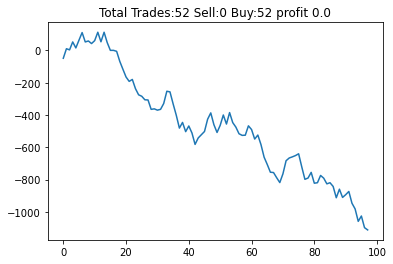

In [42]:
run(False,False,'prices.txt')
print("Made Profit : {} Total : {} in {} Trades out of {} Trades ,{} Buy,{} Sell".format(profit[(size-1)],Total,Trades,size,buyTrade,sellTrade))